In [1]:
import torch
import torch.optim as optim

#Import Models and Utility Functions.
from model import NNModel,get_loss_function
from utils import ModelHelpers,Utility

In [2]:
##Check Cuda availability and use it as device.
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")


In [ ]:
#Initialize NNModel with Bias as True or False
model_obj = NNModel(bias_value=True)
#Initialize ModelHelpers with ModelObj,Device and Criterion
model_helpers = ModelHelpers(model=model_obj,device=device,criterion = get_loss_function())
#Initialize Utitlity Class Object
utility_obj = Utility()


In [ ]:
#Use dataloaders_split method passing required batch size and num_workers according to cpu and PinMemory as true.
train_dataloader,test_dataloader = utility_obj.dataloaders_split(batch_size=512,shuffle=True,num_workers=10,pin_memory=True)

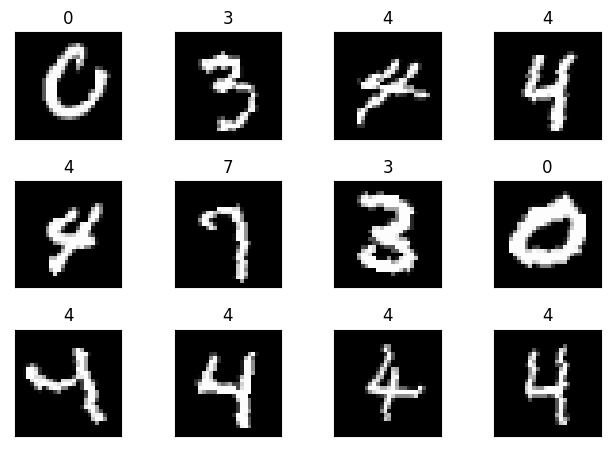

In [7]:
###Use this block to visualize the data using view_data_plot of Utilitty class
batch_data, batch_label = next(iter(train_dataloader)) 
#view_data_plot method takes batch_data,label,items_to_display,rows and columns as parameters
utility_obj.view_data_plot(batch_data,batch_label,12,3,4)

In [8]:
#use view_summary method of model helper class passing input size of the input layer
model_helpers.view_summary(input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [5]:
#Initialze the Lossfunction Optimizers and Schedulers for dynamic lr stepping
optimizer = optim.SGD(model_obj.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
#Number of epoch for the model to train and test
num_epochs = 20
#init list variables to store the metrics of each epoch.
train_losses = []
test_losses = []
train_acc = []
test_acc = []

#for loop for each epoch
for epoch in range(1, num_epochs+1):
    train_accuracy,train_loss_value = model_helpers.train(train_dataloader,optimizer) #Call train method of model helper object passing only train dataloader and optimizer
    train_acc.append(train_accuracy)
    train_losses.append(train_loss_value)
    test_accuracy,test_test_loss_value = model_helpers.test(test_dataloader)  #Call test method of model helper object passing only train dataloader and optimizer
    test_acc.append(test_accuracy)
    test_losses.append(test_test_loss_value)
    scheduler.step() #Scheduler Stepping

Adjusting learning rate of group 0 to 1.0000e-02.


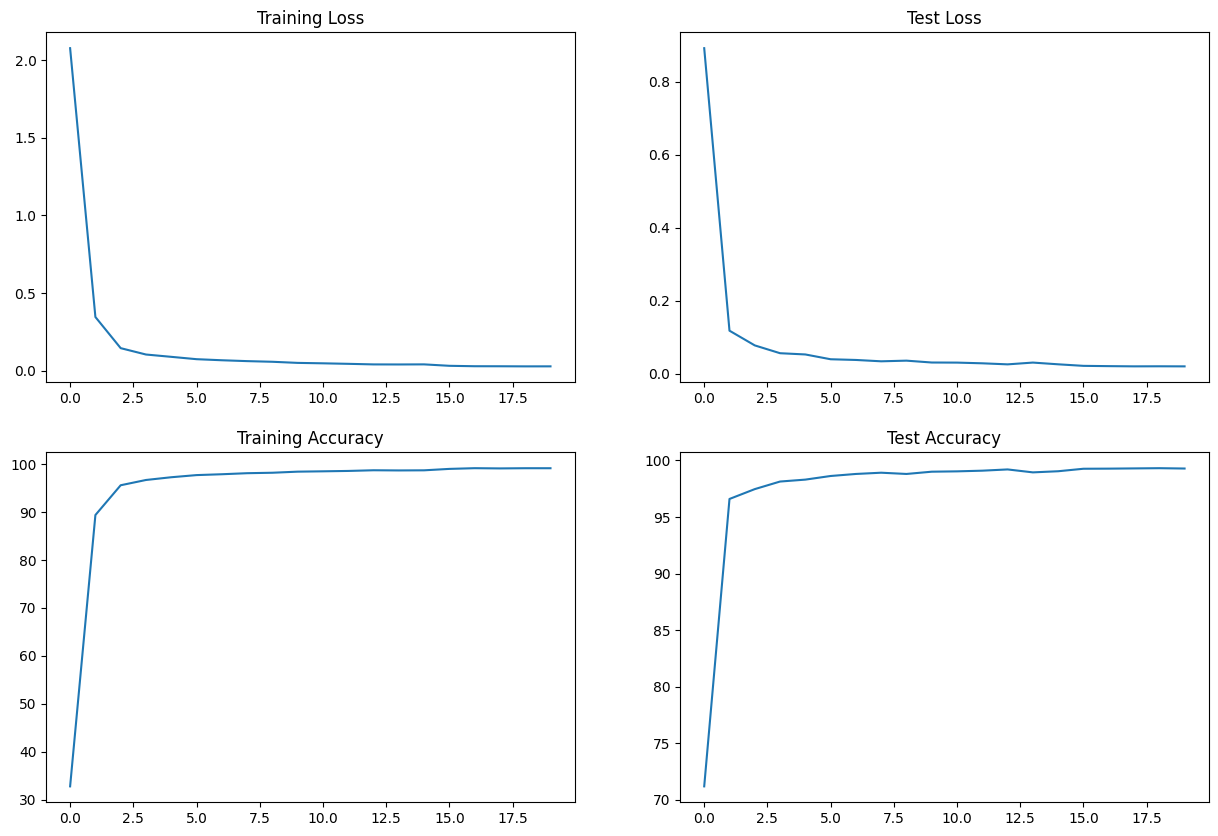

In [7]:
#Use plot_metrics method of utility class to plot the metrics
utility_obj.plot_metrics(train_losses, train_acc, test_losses, test_acc)